In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The dataset includes different features and label, the features tells about the avacado average prices,date from when the observations are collected,the total volume of avacados,remaining all the features tell about how many avacados are sold and there quantity, the type of the avacados and the region the avacados are highly gron and they have collected the information from those places which helps in the prediction of average prices.

In [3]:
#checking for the shape of the data
data.shape

(18249, 14)

By shape method I got to know that there 18249 number of rows and 14 columns in the given dataset

In [4]:
#checking for null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


After checking null we got to know that there are no missing values in the dataset

In [5]:
#checking for info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


From info method we can get to know about the type of data in each column only 3 columns are of object type and other columns are of float type and there is a column of unnamed there is no use of that column so am going ahead and deleting the column

In [6]:
#Dropping an unwanted column
data=data.drop(columns=['Unnamed: 0'],axis=1)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
#checking stats
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From stats the average price of one avacado is 1.4 dollars,the minimum price is 0.44, the max price is 3.25,the average sold avacados are 850644,the minimum sold avacados are 84.5,the max sold are 62505650 in the same way all the columns stats are described almost all the stats seems to be normally divided

In [8]:
#checking for unique values in dataset
data.apply(lambda x: len(x.unique()))

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [9]:
#lets seperate the categorical columns and check
cat_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['Date', 'type', 'region']


In [10]:
#Numeric columns
num_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [11]:
#Printing the types of avacado
print(data.type.unique())


['conventional' 'organic']


There are two types avadcado fruits:1)Conventional 2)organic

In [12]:
#printing the records
print(data.year.unique())


[2015 2016 2017 2018]


There are 4 years records available for fruit avacado in US

In [13]:
#printing the region
print(data.region.unique())

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


There are many different regions where avacados or grown lets check the count of regions

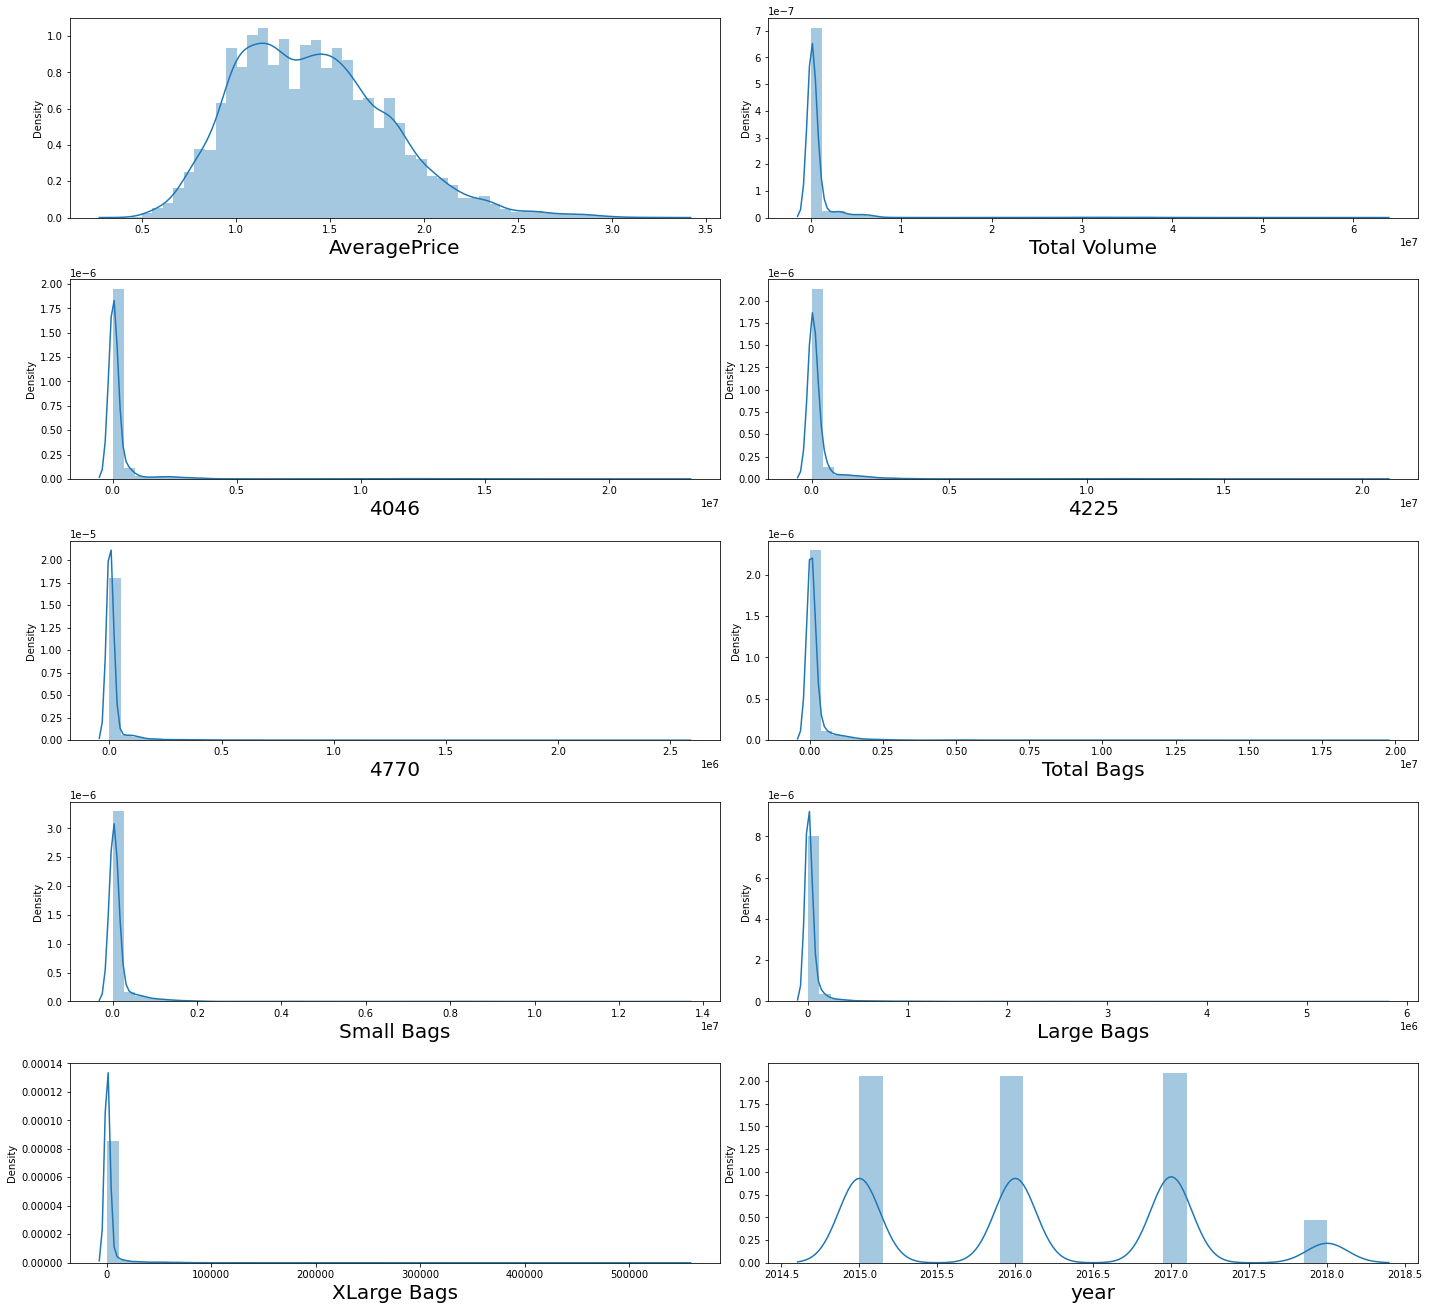

In [14]:
#Now lets plot dist plot and visualise how the data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From distribution plot we can see the average price and the year data are normally distributed but other numeric columns data seems to be skewed so there is lots of skewness in the data so lets use log transformtion for removing skewness and make the data to be normally distributed.After that we can check for the box plot to check for the outliers

In [15]:
#Applying Log transformation for removing the skewness
data['AveragePrice']=np.log(1+data['AveragePrice'])
data['Total Volume']=np.log(1+data['Total Volume'])
data['4046']=np.log(1+data['4046'])
data['4225']=np.log(1+data['4225'])
data['4770']=np.log(1+data['4770'])
data['Total Bags']=np.log(1+data['Total Bags'])
data['Small Bags']=np.log(1+data['Small Bags'])
data['Large Bags']=np.log(1+data['Large Bags'])
data['XLarge Bags']=np.log(1+data['XLarge Bags'])
data['year']=np.log(1+data['year'])


In [16]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,organic,7.610358,WestTexNewMexico
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,organic,7.610358,WestTexNewMexico
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,organic,7.610358,WestTexNewMexico
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,organic,7.610358,WestTexNewMexico


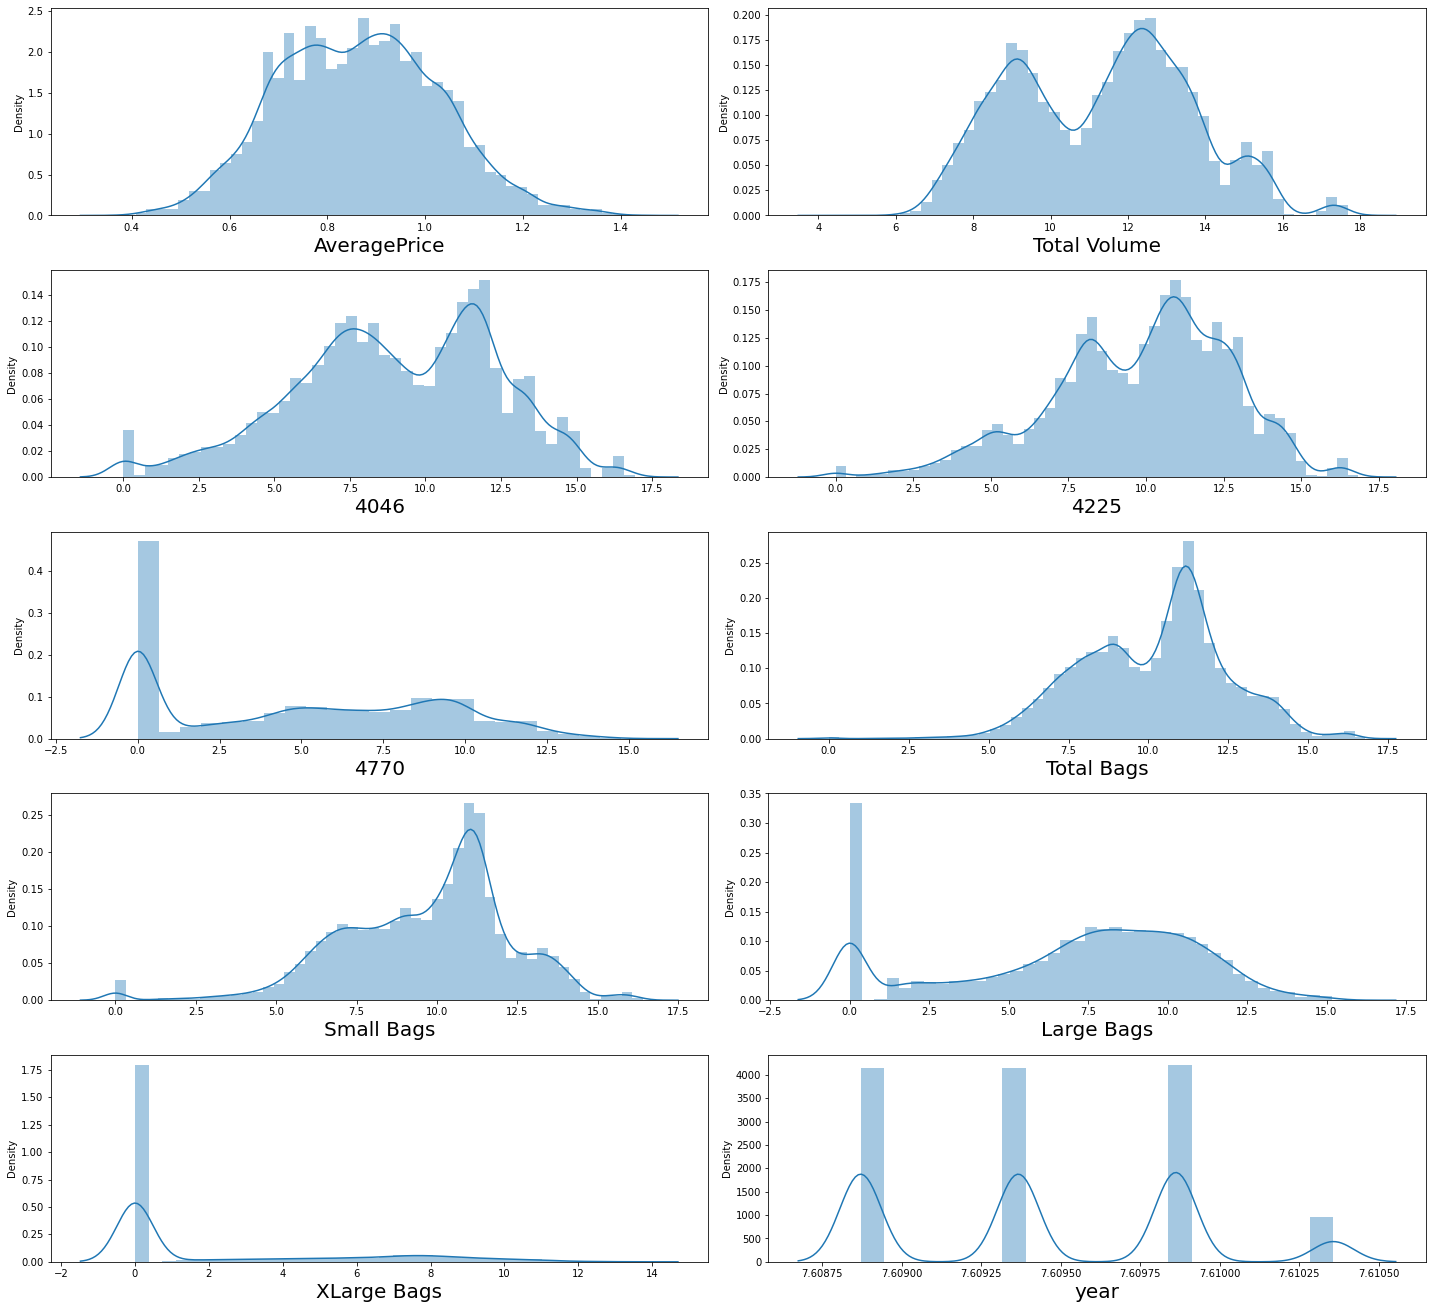

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()



after the log transformation the data seems to be normally distributed in each numeric column

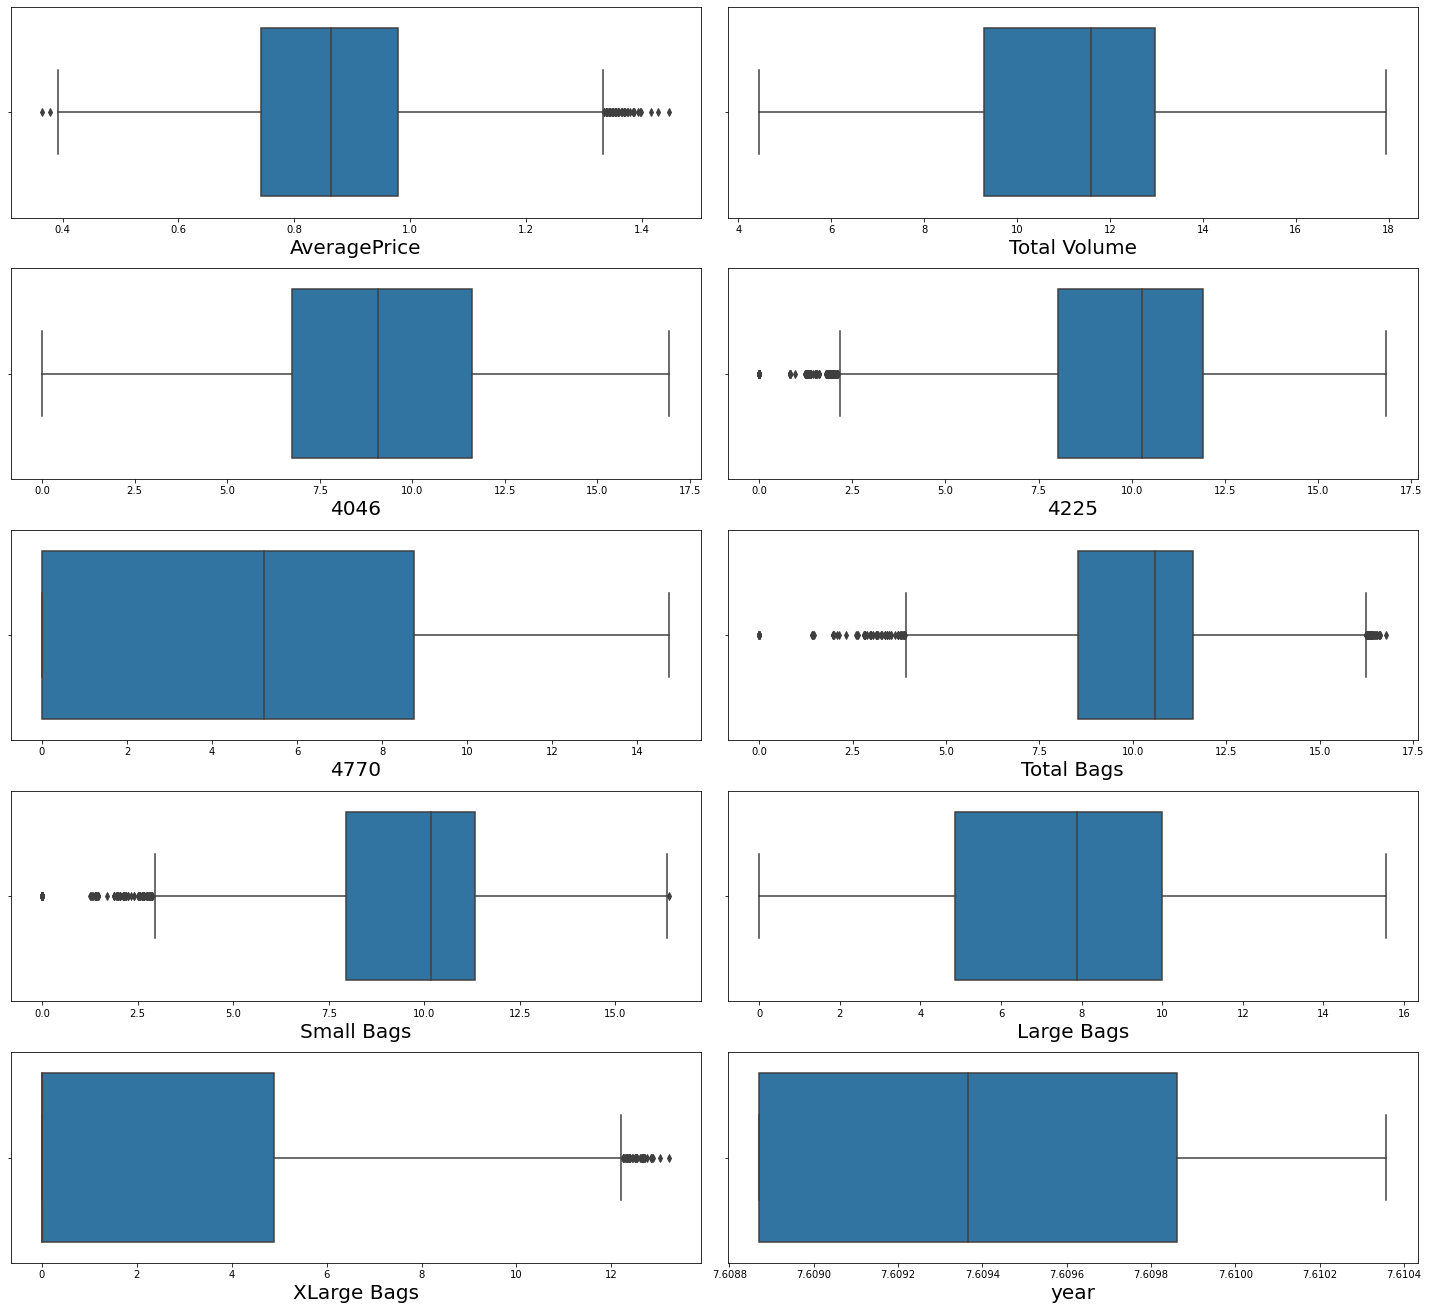

In [18]:
#Lets check the outliers using boxplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There are some outliers in the data which doesnot affect more during our model building but eventhough we go head and remove the outliers using z score

In [19]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[0.11191784 0.10728205 0.60975177 ... 0.66974686 0.64552605 1.22145777]
 [0.06002047 0.1759487  0.73770703 ... 0.65827941 0.64552605 1.22145777]
 [1.25556016 0.15869039 0.68884013 ... 0.6437429  0.64552605 1.22145777]
 ...
 [1.15374345 0.77890112 0.56825116 ... 0.87238014 0.64552605 1.96993108]
 [1.2793746  0.70779758 0.49440715 ... 0.82978729 0.64552605 1.96993108]
 [0.6003593  0.67454176 0.30415101 ... 0.99542886 0.64552605 1.96993108]]


In [20]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [ 5482  5483  5484  5485  8344  8345  9189  9190  9191  9192  9192  9203
  9204  9205  9206  9211  9212  9212  9213  9218  9219  9220  9221  9293
  9294  9298  9668  9894  9894 10154 10232 10234 10324 10325 10326 10327
 10331 10332 10333 10334 10334 10375 10377 10380 10382 10388 10392 10397
 10398 10417 10419 10420 10531 10532 10533 10534 10535 10536 10562 10563
 10566 11011 11012 11014 11015 11016 11017 11018 11019 11020 11021 11022
 11023 11024 11024 11025 11026 11027 11028 11029 11030 11031 11032 11033
 11034 11035 11036 11037 11039 11040 11041 11042 11314 11316 11318 11319
 11320 11320 11321 11321 11322 11324 11325 11325 11326 11327 11329 11330
 11331 11332 11333 11333 11334 11335 11336 11337 11338 11338 11339 11340
 11341 11342 11347 11347 11348 11348 11349 11349 11350 11350 11351 11352
 11353 11354 11354 11373 11374 11375 11376 11378 11379 11380 11381 11382
 11383 11384 11385 11386 11387 11387 11388 11388 11389 11390 11391 11392
 11393 11394 11395 11397 11398 11399 1

In [21]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [22]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,7.608871,Albany
1,2015-12-20,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,7.608871,Albany
2,2015-12-13,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,7.608871,Albany
3,2015-12-06,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,7.608871,Albany
4,2015-11-29,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,7.608871,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,organic,7.610358,WestTexNewMexico
18245,2018-01-28,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,organic,7.610358,WestTexNewMexico
18246,2018-01-21,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,organic,7.610358,WestTexNewMexico
18247,2018-01-14,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,organic,7.610358,WestTexNewMexico


We have removed some of the rows which having outliers in the data after that our number of rows got changed from 18249 to 17928

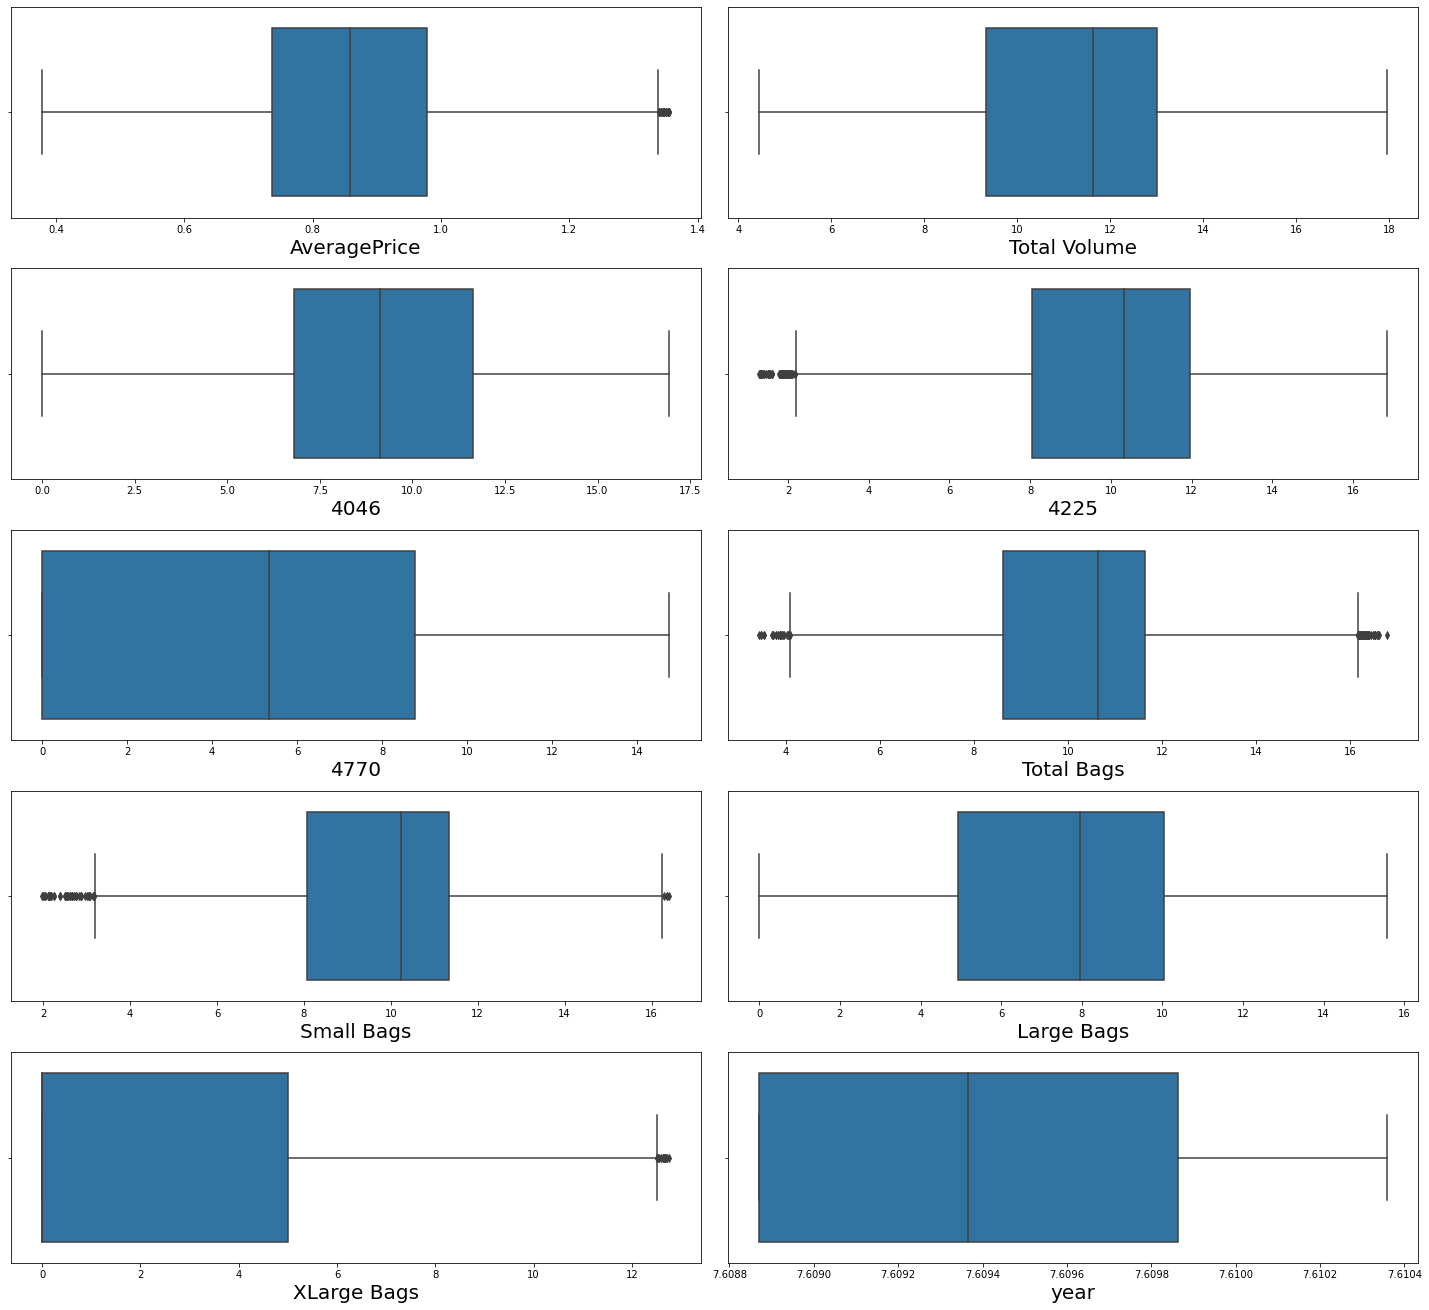

In [23]:
#Lets check the outliers using boxplot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


Now the data seems to be noramal with very less presence of outliers we are done with removing the otliers and we go head and find the relations between the label to features and features to features using heat map and scatter plot

## Correlation Plot

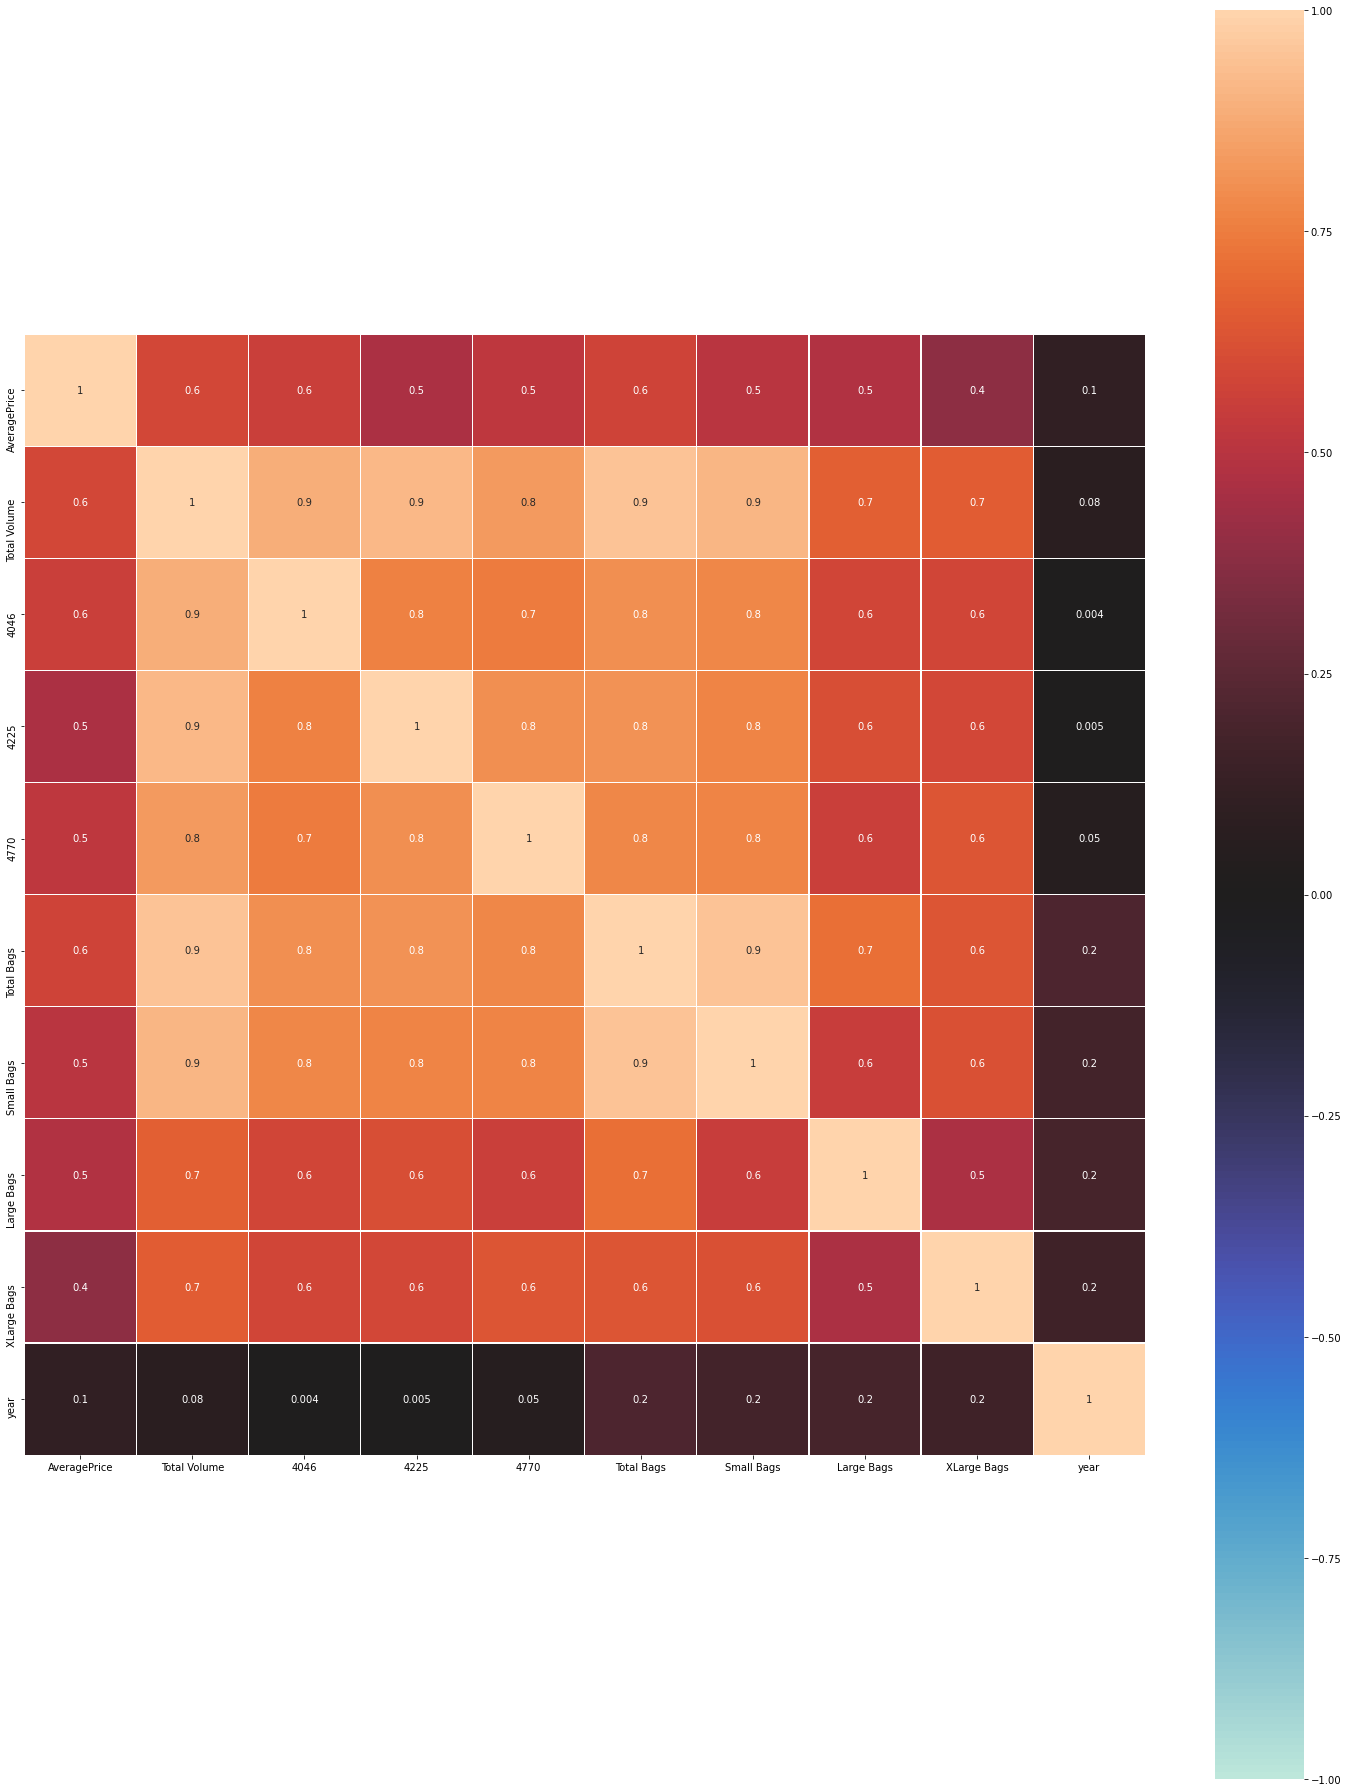

In [24]:
#lets plot heat map to find the multicollinearty with the features
df_corr=data.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

1.Label to feature relationship:- The label is highly(60%) correlated with total volume,4046,total bags and less correlated with year of 10%.

2.Feature to feature relation ship:- The total volume is highly correlated with 4046 column,4225,and all the other columns too very less corelated with year,all the features are also highly corelated with each other only the year feature is not correlated with any other feature.so year feature is independent to other features.so there is multicollinearity problem exits with features but am not dropping any of the column now after checking the model performance if it is not good then am goint to drop total volumn column because it is highly correlated with the other features

### Visualisation 

<AxesSubplot:xlabel='type', ylabel='count'>

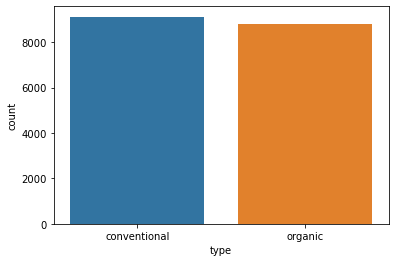

In [25]:
#Lets plot the count plot on categorical data
sns.countplot(data['type'])

Avacados are of both conventional and organic types,


both are grown equally in the seasons  where people consume more in US

<AxesSubplot:xlabel='region', ylabel='count'>

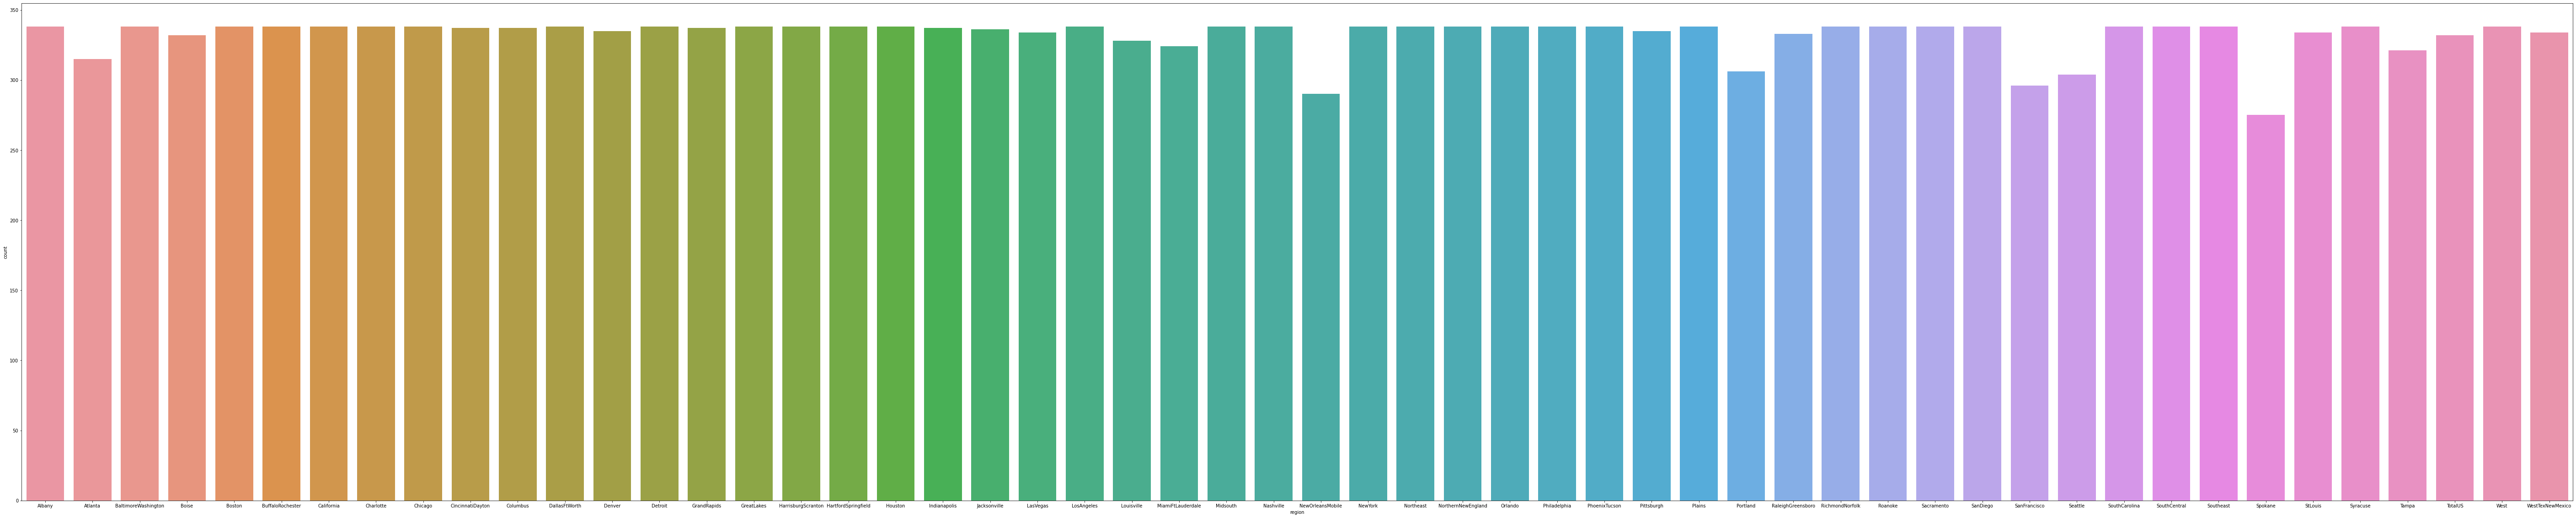

In [26]:
#count plot for region
plt.figure(figsize=(100,20))
sns.countplot(data['region'])

In those regions the avacados are heavily grown so many of the observations of avacados are taken from the regions of almost equal observations from all the places.In some of the place some information is less.

In [27]:
pd.crosstab(data['Date'],data['region']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2015-01-11,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2015-01-18,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2015-01-25,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2015-02-01,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2018-03-04,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
2018-03-11,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,...,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9


From the above table we can see the on the above mention days the observations of avacados are taken from each region and collected all the information to find the prices of avacados

In [28]:
pd.crosstab(data['AveragePrice'],data['type']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

type,conventional,organic
AveragePrice,,
0.378436,100.0,0.0
0.392042,0.0,100.0
0.398776,50.0,50.0
0.412110,60.0,40.0
0.418710,66.7,33.3
...,...,...
1.345472,0.0,100.0
1.348073,0.0,100.0
1.350667,0.0,100.0


From the above table we can see how the average price of avacado ranges for a conventional and organic type avacados

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

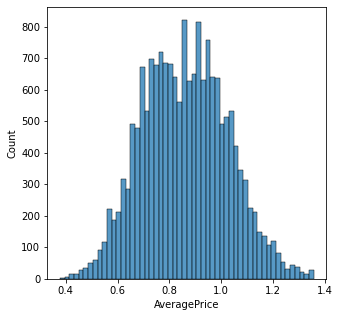

In [29]:

#Plotting the hist plot to check the flow of data for label column
plt.figure(figsize=(5,5))
sns.histplot(data['AveragePrice'])

Hist plot tells about the average price distribution of avacados up to the certain point the prices of avacado are increasing the prices of 800 avacados have gone to 0.8 to 1.0 dollars after that the prices came down which means there is no much demand for the avacados when the price got increased from 1.0 t0 1.4.As the prices increase sales also decreases.   

### Encoding Tehniques

In [30]:
#Using Label Encoder to convert categorical to numeric
#importing label encoder
#label encoding for 'Date' column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(data['Date'])
lab_enc

array([ 51,  50,  49, ..., 159, 158, 157])

In [31]:
data['Date']=lab_enc


In [32]:
### Importing ordinal encoder
from sklearn.preprocessing import LabelEncoder
la_enc=LabelEncoder()
la_enc=la_enc.fit_transform(data['type'])
la_enc

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
data['type']=la_enc


In [34]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,7.608871,Albany
1,50,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,7.608871,Albany
2,49,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,7.608871,Albany
3,48,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,7.608871,Albany
4,47,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,7.608871,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,7.610358,WestTexNewMexico
18245,160,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,7.610358,WestTexNewMexico
18246,159,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,7.610358,WestTexNewMexico
18247,158,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,7.610358,WestTexNewMexico


In [35]:
#encoding the region column using get dummies method
df=pd.get_dummies(data['region'],drop_first=False)
df

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
#concatinating both the dataset and dummies
data=pd.concat([data,df],axis=1)
#getting for all the features
pd.set_option('max_columns',None)


In [37]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,7.608871,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,7.608871,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,7.608871,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,7.608871,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,7.608871,Albany,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,7.610358,WestTexNewMexico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18245,160,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,7.610358,WestTexNewMexico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18246,159,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,7.610358,WestTexNewMexico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18247,158,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,7.610358,WestTexNewMexico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data=data.drop(columns=['region'],axis=1)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,7.608871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,7.608871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,7.608871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,7.608871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,7.608871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,0.966984,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,7.610358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18245,160,0.996949,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,7.610358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18246,159,1.054312,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,7.610358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18247,158,1.075002,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,7.610358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
#Lets split the data into features and label and store them in x and y variables
#splitting the dataset into features and label in to two variables x and y
#Total volume feature is highly corelated with all the other features so am dropping
x=data.drop(['AveragePrice'],axis=1)
y=data['AveragePrice']

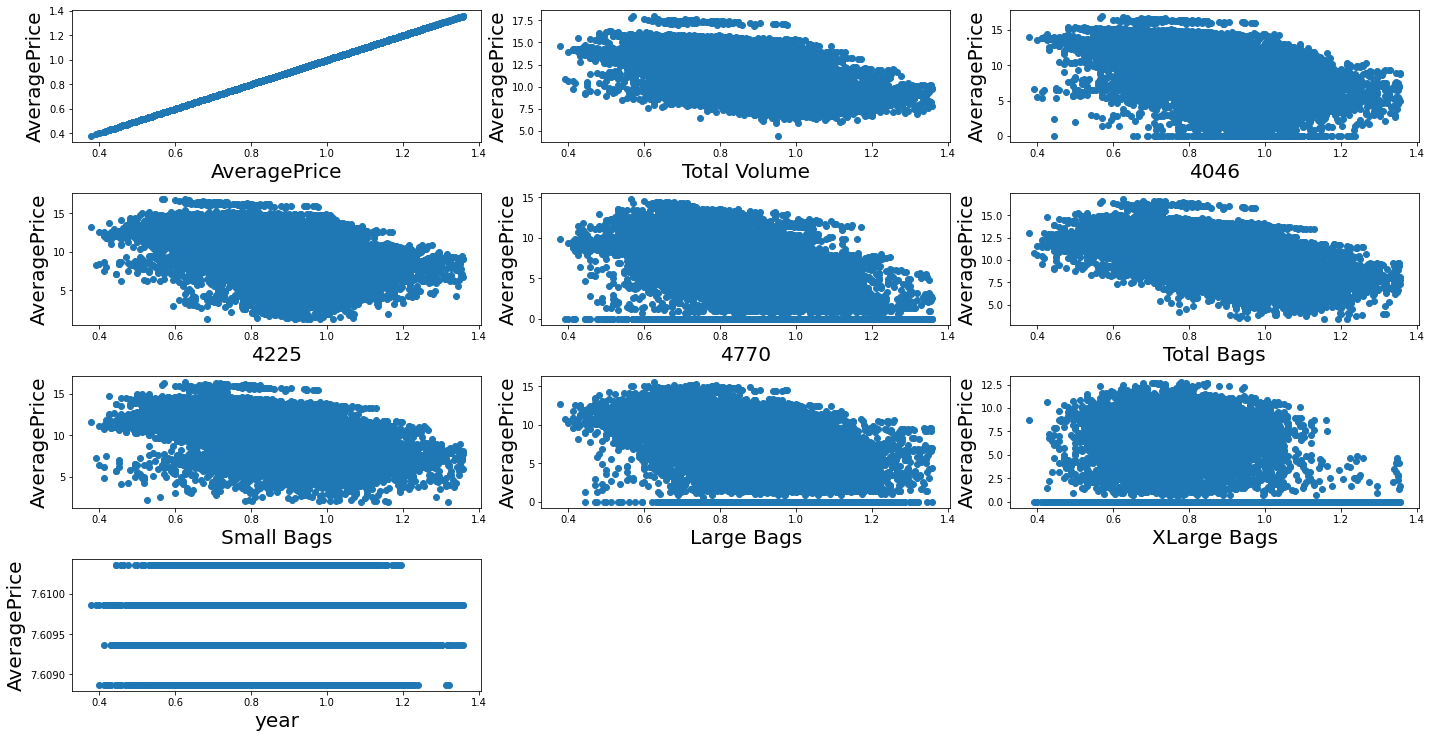

In [40]:
#Lets plot scatter plot to check the relation between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(y,data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()


From the scatter plot we can say that all the features are highly correlated with the label in all the graphs the data points are steaping down from left to right which means the label and features are highly correlated to each other so all the faetures contribute much for the analyis and prediction and in the year and average price almost the sales have been increased from year to year.

In [41]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['Total Volume','4046', '4225', '4770', 'Small Bags','Total Bags','Large Bags', 'XLarge Bags','year']
x[feature_scale]=scaler.fit_transform(x[feature_scale])
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewOrleansMobile,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,Sacramento,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,-0.126870,-0.622386,0.361843,-0.297384,-0.539063,-0.316726,-0.682784,-0.65336,0,-1.234189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,-0.195949,-0.750413,0.290654,-0.251969,-0.498584,-0.279287,-0.671291,-0.65336,0,-1.234189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49,0.140697,-0.701519,0.610887,-0.059742,-0.568890,-0.344989,-0.656723,-0.65336,0,-1.234189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,-0.036168,-0.596218,0.461757,-0.199979,-0.722612,-0.490833,-0.589406,-0.65336,0,-1.234189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47,-0.227747,-0.651076,0.284173,-0.189697,-0.694307,-0.468646,-0.488008,-0.65336,0,-1.234189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,-0.708058,-0.419831,-0.917505,-1.238140,-0.338912,-0.141687,-0.284653,-0.65336,1,1.958741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18245,160,-0.798669,-0.580917,-0.628150,-1.238140,-0.510261,-0.300660,-0.358852,-0.65336,1,1.958741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18246,159,-0.802516,-0.580862,-0.748369,0.353889,-0.503953,-0.281800,-0.885857,-0.65336,1,1.958741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18247,158,-0.730986,-0.506977,-0.678537,0.353581,-0.433368,-0.216883,-0.843172,-0.65336,1,1.958741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Principle Component Analysis


In [42]:
#importing PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)
var_cumu=np.cumsum(pca.explained_variance_ratio_)*100
var_cumu

array([ 99.61538874,  99.87730697,  99.90092736,  99.92105363,
        99.93258494,  99.9429025 ,  99.95157484,  99.95565872,
        99.9592228 ,  99.96082069,  99.96182096,  99.96260995,
        99.96339894,  99.96418792,  99.96497691,  99.9657659 ,
        99.96655488,  99.96734387,  99.96813286,  99.96892184,
        99.96971083,  99.97049982,  99.97128881,  99.97207779,
        99.97286678,  99.97365577,  99.97444475,  99.97523374,
        99.97602273,  99.97681171,  99.9776007 ,  99.97838969,
        99.97917867,  99.97996766,  99.98075591,  99.981544  ,
        99.98233093,  99.98311766,  99.98390333,  99.98468802,
        99.9854712 ,  99.98625326,  99.98703446,  99.98781431,
        99.98859342,  99.98937185,  99.99014897,  99.99092031,
        99.99168464,  99.99244172,  99.99319376,  99.99394008,
        99.99466671,  99.99538225,  99.99609459,  99.99677231,
        99.99743124,  99.99801827,  99.99855554,  99.9990254 ,
        99.99943847,  99.99972516,  99.99995429, 100.  

After transforming the data using PCA all the components have achieved more than 95% so we can use all the columns data in our model

### Scree Plot

By using scree plot we are going to take 1000's components and among them how many are required those only we consider and other components we remove from that.

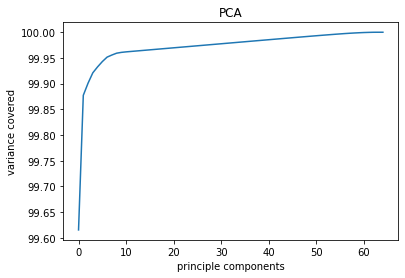

In [43]:
#checking from plot
plt.figure()
plt.plot(var_cumu)
plt.xlabel('principle components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

All the components are retaining more than 95% so we can go ahead and use all the components in our model building

In [44]:
finalPCA=PCA()
final_data=finalPCA.fit_transform(x)
data_component=pd.DataFrame(final_data)
data_component

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,33.591075,-0.710247,0.132369,0.454295,-0.612555,-0.007642,0.492262,0.710061,-0.466974,-0.103944,-0.001581,2.498217e-02,-1.526374e-01,1.002086e-01,1.995303e-01,1.007635e-01,-1.268390e-01,-4.239433e-02,-1.119957e-01,9.044780e-02,5.440998e-01,-2.891490e-01,2.573356e-01,-6.816090e-02,1.373406e-01,2.303329e-01,-1.316646e-01,1.490360e-01,2.477761e-01,-9.814592e-02,2.330361e-01,9.228055e-02,8.442282e-02,-2.125100e-02,0.092901,-0.193273,-0.021613,0.003220,-0.026861,0.048804,-0.051228,-0.075357,-0.047313,0.016000,-0.035769,0.072483,-0.001167,-0.022263,-0.024247,0.002786,-0.003789,0.036753,-0.060419,-0.029480,-0.014761,-0.003349,-0.051673,0.087440,0.071719,0.023506,0.000351,0.039462,0.066293,0.006830,7.431111e-13
1,34.590644,-0.755569,0.137457,0.421101,-0.647351,-0.153958,0.426495,0.694106,-0.473859,-0.105746,-0.018493,2.498217e-02,-1.526374e-01,1.002086e-01,1.995303e-01,1.007635e-01,-1.268390e-01,-4.239433e-02,-1.119957e-01,9.044780e-02,5.440998e-01,-2.891490e-01,2.573356e-01,-6.816090e-02,1.373406e-01,2.303329e-01,-1.316646e-01,1.490360e-01,2.477761e-01,-9.814592e-02,2.330361e-01,9.228055e-02,8.442282e-02,-2.125100e-02,0.092889,-0.193237,-0.021627,0.003225,-0.026830,0.048782,-0.051251,-0.075681,-0.047206,0.016097,-0.035517,0.072575,-0.001172,-0.022524,-0.025001,0.003832,-0.003946,0.034382,-0.058812,-0.033840,-0.013931,-0.004667,-0.050265,0.078251,0.076723,0.008246,-0.016492,0.013401,0.057800,0.020919,-5.926283e-13
2,35.590716,-0.462813,0.131236,0.476383,-0.905525,0.023493,0.568075,0.651755,-0.431958,-0.038012,0.099942,2.498217e-02,-1.526374e-01,1.002086e-01,1.995303e-01,1.007635e-01,-1.268390e-01,-4.239433e-02,-1.119957e-01,9.044780e-02,5.440998e-01,-2.891490e-01,2.573356e-01,-6.816090e-02,1.373406e-01,2.303329e-01,-1.316646e-01,1.490360e-01,2.477761e-01,-9.814592e-02,2.330361e-01,9.228055e-02,8.442282e-02,-2.125100e-02,0.092921,-0.193214,-0.021848,0.003258,-0.027021,0.048622,-0.050955,-0.075774,-0.048307,0.015716,-0.035926,0.072340,0.000132,-0.020075,-0.021528,-0.000752,-0.005822,0.040567,-0.064628,-0.020696,-0.018003,-0.004960,-0.065181,0.127175,0.128697,0.028957,0.024664,0.090583,0.196556,-0.028445,1.429126e-13
3,36.591453,-0.684880,0.065385,0.340426,-0.762753,0.179441,0.508381,0.640387,-0.469414,-0.096080,0.075827,2.498217e-02,-1.526374e-01,1.002086e-01,1.995303e-01,1.007635e-01,-1.268390e-01,-4.239433e-02,-1.119957e-01,9.044780e-02,5.440998e-01,-2.891490e-01,2.573356e-01,-6.816090e-02,1.373406e-01,2.303329e-01,-1.316646e-01,1.490360e-01,2.477761e-01,-9.814592e-02,2.330361e-01,9.228055e-02,8.442282e-02,-2.125100e-02,0.092861,-0.193143,-0.021687,0.003260,-0.026981,0.048513,-0.050842,-0.075226,-0.048085,0.015713,-0.036005,0.072202,-0.000240,-0.020252,-0.020965,-0.001951,-0.005478,0.041001,-0.062437,-0.021172,-0.018026,-0.004568,-0.062032,0.132225,0.100765,0.022857,0.045340,0.091872,0.129480,-0.004830,2.652878e-13
4,37.590911,-0.787838,0.003644,0.234936,-0.697385,0.062244,0.350502,0.628230,-0.484571,-0.141457,0.021276,2.498217e-02,-1.526374e-01,1.002086e-01,1.995303e-01,1.007635e-01,-1.268390e-01,-4.239433e-02,-1.119957e-01,9.044780e-02,5.440998e-01,-2.891490e-01,2.573356e-01,-6.816090e-02,1.373406e-01,2.303329e-01,-1.316646e-01,1.490360e-01,2.477761e-01,-9.814592e-02,2.330361e-01,9.228055e-02,8.442282e-02,-2.125100e-02,0.092817,-0.193089,-0.021571,0.003260,-0.026870,0.048511,-0.050846,-0.075319,-0.047762,0.015913,-0.035629,0.072351,-0.000706,-0.021127,-0.022285,-0.000616,-0.005148,0.037523,-0.059154,-0.029296,-0.016421,-0.005532,-0.056246,0.114872,0.086939,-0.004671,0.032097,0.043881,0.055376,0.023017,4.989348e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Now all the features are converted to number of components and all information of features is available

### Train Test Split

In [45]:
#Splitting the data into train and test 
#importing the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_component,y,test_size=0.25,random_state=500)

### Building the Algorithms

### Regression Models

In [46]:
#importing the libraries for building algorithms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
#importing Grid search cv and cross validation score
from sklearn.model_selection import GridSearchCV,cross_val_score

### Linear Regression

In [47]:
 ### Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [48]:
lr_y_pred=lr.predict(x_test)
lr_y_pred

array([0.714529  , 0.97378912, 0.65448267, ..., 0.67452799, 0.85833883,
       0.81030335])

### Evaluation Metrics

In [49]:
lr.score(x_train,y_train)

0.7339366848117429

In [50]:
lr.score(x_test,y_test)

0.7467515723527439

In [51]:
np.mean(cross_val_score(lr,data_component,y,cv=5))

0.47724275752651846

In [52]:
mean_squared_error(y_test,lr_y_pred)
                

0.006753358027640975

In [53]:
mean_absolute_error(y_test,lr_y_pred)

0.0639095929580381

In [54]:
np.sqrt(mean_squared_error(y_test,lr_y_pred))

0.0821788173901339

### KNeighbors Regressor

In [55]:
#fitting the model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

### Prediction

In [56]:
y_pred=knn.predict(x_test)
y_pred

array([0.82751769, 1.05688995, 0.71890761, ..., 0.77799998, 0.79934767,
       0.74720724])

### Evaluating Metrics

In [57]:
#Finding score
knn.score(x_test,y_test)

0.7873121255771509

In [58]:
#Finding cross val score
scr=cross_val_score(knn,data_component,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  -77.46377238920059


In [59]:
mean_squared_error(y_test,y_pred)

0.005671732604461073

In [60]:
mean_absolute_error(y_test,y_pred)

0.057423826806060466

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.07531090627831452

### Decision Tree Regressor

In [62]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
y_pred=dt.predict(x_test)

### Evaluation Metrics

In [64]:
dt.score(x_test,y_test)

0.8198923293796164

In [65]:
#Finding cross val score
scr=cross_val_score(dt,data_component,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  6.2355967915446


In [66]:
mean_squared_error(y_test,y_pred)

0.004802918598642137

In [67]:
mean_absolute_error(y_test,y_pred)

0.04649151738828055

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06930309227330435

### Random Forest Regressor

In [69]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
y_pred=rf.predict(x_test)

### Evaluation Metrics

In [71]:
#Finding the score
rf.score(x_test,y_test)

0.9278637623120791

In [72]:
#Finding cross val score
scr=cross_val_score(rf,data_component,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  51.41919444441479


In [73]:
mean_squared_error(y_test,y_pred)

0.0019236519823613437

In [74]:
mean_absolute_error(y_test,y_pred)

0.031723927996234726

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.04385945715990274

### Support Vector Regressor

In [76]:
svm=SVR()
svm.fit(x_train,y_train)


SVR()

In [77]:
y_pred=svm.predict(x_test)
y_pred

array([0.93575755, 0.96923182, 0.76873234, ..., 0.77083018, 0.76772768,
       0.77046863])

### Evaluation Metrics

In [78]:
svm.score(x_test,y_test)

0.7068196828824995

In [79]:
#Finding cross val score
scr=cross_val_score(svm,data_component,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  11.975166567739311


In [80]:
mean_squared_error(y_test,y_pred)

0.007818218918656535

In [81]:
mean_absolute_error(y_test,y_pred)

0.06984661530357839

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.08842069281936517

### XGBoost

In [83]:
### Extreme Gradient Booster
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred=xgb.predict(x_test)

In [85]:
xgb.score(x_test,y_test)

0.9307005385049043

In [86]:
np.mean(cross_val_score(xgb,data_component,y,cv=5))

0.6125200649670477

In [87]:
mean_squared_error(y_test,y_pred)

0.0018480038709301416

In [88]:
mean_absolute_error(y_test,y_pred)

0.032103675320957245

In [89]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.042988415543377984

### Ridge Regressor

In [90]:
rp=Ridge()
rp.fit(x_train,y_train)

Ridge()

In [91]:
y_pred=rp.predict(x_test)

### Evaluation Metrics

In [92]:
rp.score(x_test,y_test)

0.7467447998224992

In [93]:
np.mean(cross_val_score(rp,data_component,y,cv=5))

0.4816599383598151

In [94]:
mean_squared_error(y_test,y_pred)

0.006753538630229196

In [95]:
mean_absolute_error(y_test,y_pred)

0.06394502891062914

In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.08217991622184337

After checking all the scores and cross validation scores of the models,the performance is good in KNeighbors Classifier So am considering that as final model.In KNN there is no much difference with score and cross validation score so am finalising the model as KNN.

### Final Model

### KNeighborsClassifier

### Hyper Parameter Tuning

In [102]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':np.arange(2,15),'n_neighbors':[3,5,7,11,13]}

In [103]:
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1)

In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_neighbors': [3, 5, 7, 11, 13]})

In [105]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 3}

In [109]:
knn=KNeighborsRegressor(algorithm='kd_tree',leaf_size=2,n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=2, n_neighbors=3)

In [115]:
y_pred_test=knn.predict(x_test)

In [116]:
knn.score(x_test,y_test)*100

81.70177182861387

In [117]:
np.mean(cross_val_score(knn,data_component,y,cv=5))*100

-83.22912435697705

After Hyper parameter tuning our score and cross validations scores got improved so lets finalise our model as KNeighbors Regressor as our Final MOdel.

### Conclusion

In [119]:
a=np.array(y_test)
predicted=np.array(y_pred_test)
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,0.732368,0.795759
1,0.955511,0.985074
2,0.717840,0.734468
3,1.111858,1.123789
4,0.828552,0.871704
...,...,...
4477,1.105257,1.021580
4478,0.662688,0.741371
4479,0.760806,0.796324
4480,0.760806,0.808583


Both the orginal label data and the predicted label data are varying with slight difference using our KNN Model.So our final model for predicting is KNN.

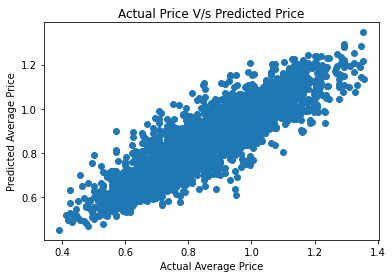

In [120]:
#Curve for actual and predicted value
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('Actual Price V/s Predicted Price')
plt.show()

Almost the actual and predicted are linearly varying with some deviations in some of the data point but no much difference.Amost its linearly distributed throughout the data points

In [121]:
#Saving the model
import pickle
filename='Avacado Average Price prediction.pkl'
pickle.dump(knn,open(filename,'wb'))